In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as s
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
insta=pd.read_excel("Influencer.xlsx")
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,\ncristiano,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,kyliejenner,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,\nleomessi,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,NaN
3,4.0,\nselenagomez,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,\ntherock,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [3]:
insta.shape

(200, 10)

In [4]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    float64
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    float64
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


In [5]:
insta.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [6]:
insta["Country Or Region"].fillna("Other",inplace=True)

In [7]:
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,\ncristiano,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,kyliejenner,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,\nleomessi,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,Other
3,4.0,\nselenagomez,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,\ntherock,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


# Data cleaning

## Rank feature

In [8]:
insta["Rank"].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

## Channel info feature

In [9]:
insta["Channel Info"]=insta["Channel Info"].astype("str")

insta["Channel Info"]=insta["Channel Info"].apply(lambda x: x.strip("\n"))

insta["Channel Info"]=insta["Channel Info"].apply(lambda x: x.capitalize())

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,Kyliejenner,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,Leomessi,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,Other
3,4.0,Selenagomez,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,Therock,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


## For visualization on data we take a copy of the data

In [10]:
instagram_data=insta.copy()

## Follower feature

In [11]:
millon_follower=insta[insta["Followers"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Followers"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Followers"].apply(lambda x: x[-1] in "0123456789")]

In [12]:
def billon(x):
    a=x.strip("b")
    b=pd.to_numeric(a)
    b=b*1000000000
    return b

In [13]:
def millons(x):
    a=x.strip("m")
    b=pd.to_numeric(a)
    b=b*1000000
    return b

In [14]:
def k(x):
    a=x.strip("k")
    b=pd.to_numeric(a)
    b=b*1000
    return b

In [15]:
millon_follower["Followers"]=millon_follower["Followers"].apply(millons)

k_follower["Followers"]=k_follower["Followers"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,Leomessi,90.0,363900000.0,6.7m,915.0,0.010,3.5m,6.1b,Other
3,4.0,Selenagomez,93.0,348800000.0,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,Therock,91.0,339400000.0,1.8m,6.8k,0.003,932.0k,12.6b,United States


## Average likes feature

In [16]:
millon_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1] in "0123456789")]

In [17]:
millon_follower["Avg. Likes"]=millon_follower["Avg. Likes"].apply(millons)

k_follower["Avg. Likes"]=k_follower["Avg. Likes"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8700000.0,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8200000.0,7.0k,0.014,5.0m,57.4b,United States
2,3.0,Leomessi,90.0,363900000.0,6700000.0,915.0,0.010,3.5m,6.1b,Other
3,4.0,Selenagomez,93.0,348800000.0,6100000.0,1.9k,0.005,1.7m,11.4b,United States
4,5.0,Therock,91.0,339400000.0,1800000.0,6.8k,0.003,932.0k,12.6b,United States


## Posts feature

In [18]:
insta["Posts"]=insta["Posts"].astype("str")

millon_follower=insta[insta["Posts"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Posts"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Posts"].apply(lambda x: x[-1] in "0123456789")]

In [19]:
millon_follower["Posts"]=millon_follower["Posts"].apply(millons)

k_follower["Posts"]=k_follower["Posts"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8700000.0,3400.0,0.013,6.3m,29.1b,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8200000.0,7000.0,0.014,5.0m,57.4b,United States
3,4.0,Selenagomez,93.0,348800000.0,6100000.0,1900.0,0.005,1.7m,11.4b,United States
4,5.0,Therock,91.0,339400000.0,1800000.0,6800.0,0.003,932.0k,12.6b,United States
5,6.0,Arianagrande,92.0,333000000.0,3700000.0,5000.0,0.009,3.1m,18.5b,United States
...,...,...,...,...,...,...,...,...,...,...
171,172.0,Eminem,84.0,36600000.0,988400.0,691.0,0.011,382.5k,683.0m,United States
174,175.0,Nattinatasha,47.0,36100000.0,513200.0,59.0,0.006,201.6k,30.3m,Czech Republic
181,182.0,Toni.krs,83.0,35600000.0,597800.0,946.0,0.012,432.5k,565.5m,Other
189,190.0,Adidasoriginals,83.0,34100000.0,136200.0,180.0,0.002,66.8k,24.5m,Other


## New post like feature

In [20]:
insta["New Post Avg. Likes"]=insta["New Post Avg. Likes"].astype("str")

millon_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1] in "0123456789")]

In [21]:
millon_follower["New Post Avg. Likes"]=millon_follower["New Post Avg. Likes"].apply(millons)

k_follower["New Post Avg. Likes"]=k_follower["New Post Avg. Likes"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8700000.0,3400.0,0.013,6300000.0,29.1b,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8200000.0,7000.0,0.014,5000000.0,57.4b,United States
3,4.0,Selenagomez,93.0,348800000.0,6100000.0,1900.0,0.005,1700000.0,11.4b,United States
5,6.0,Arianagrande,92.0,333000000.0,3700000.0,5000.0,0.009,3100000.0,18.5b,United States
6,7.0,Kimkardashian,91.0,330700000.0,3500000.0,5700.0,0.005,1700000.0,19.8b,United States
...,...,...,...,...,...,...,...,...,...,...
174,175.0,Nattinatasha,47.0,36100000.0,513200.0,59.0,0.006,201600.0,30.3m,Czech Republic
181,182.0,Toni.krs,83.0,35600000.0,597800.0,946.0,0.012,432500.0,565.5m,Other
189,190.0,Adidasoriginals,83.0,34100000.0,136200.0,180.0,0.002,66800.0,24.5m,Other
198,199.0,Luansantana,79.0,33500000.0,193300.0,865.0,0.003,82600.0,167.2m,Brazil


In [22]:
insta["Total Likes"]=insta["Total Likes"].astype("str")

billon_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="b")]

millon_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Total Likes"].apply(lambda x: x[-1] in "0123456789")]

In [23]:
millon_follower["Total Likes"]=millon_follower["Total Likes"].apply(millons)

billon_follower["Total Likes"]=billon_follower["Total Likes"].apply(billon)

k_follower["Total Likes"]=k_follower["Total Likes"].apply(k)

insta= pd.concat([billon_follower,millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8700000.0,3400.0,0.013,6300000.0,29100000000.0,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8200000.0,7000.0,0.014,5000000.0,57400000000.0,United States
3,4.0,Selenagomez,93.0,348800000.0,6100000.0,1900.0,0.005,1700000.0,11400000000.0,United States
5,6.0,Arianagrande,92.0,333000000.0,3700000.0,5000.0,0.009,3100000.0,18500000000.0,United States
6,7.0,Kimkardashian,91.0,330700000.0,3500000.0,5700.0,0.005,1700000.0,19800000000.0,United States
...,...,...,...,...,...,...,...,...,...,...
174,175.0,Nattinatasha,47.0,36100000.0,513200.0,59.0,0.006,201600.0,30300000.0,Czech Republic
181,182.0,Toni.krs,83.0,35600000.0,597800.0,946.0,0.012,432500.0,565500000.0,Other
189,190.0,Adidasoriginals,83.0,34100000.0,136200.0,180.0,0.002,66800.0,24500000.0,Other
198,199.0,Luansantana,79.0,33500000.0,193300.0,865.0,0.003,82600.0,167200000.0,Brazil


## Enagement rate feature

In [24]:
insta["60-Day Eng Rate"]=insta["60-Day Eng Rate"].apply(lambda x:x*100)

# Cleaned data for analysis

In [25]:
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485200000.0,8700000.0,3400.0,1.3,6300000.0,29100000000.0,Spain
1,2.0,Kyliejenner,91.0,370700000.0,8200000.0,7000.0,1.4,5000000.0,57400000000.0,United States
3,4.0,Selenagomez,93.0,348800000.0,6100000.0,1900.0,0.5,1700000.0,11400000000.0,United States
5,6.0,Arianagrande,92.0,333000000.0,3700000.0,5000.0,0.9,3100000.0,18500000000.0,United States
6,7.0,Kimkardashian,91.0,330700000.0,3500000.0,5700.0,0.5,1700000.0,19800000000.0,United States


In [26]:
insta.rename(columns={
    "Country Or Region": "Country"
},inplace=True)

# Uncleaned data

In [27]:
instagram_data.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1.0,Cristiano,92.0,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2.0,Kyliejenner,91.0,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3.0,Leomessi,90.0,363.9m,6.7m,915.0,0.010,3.5m,6.1b,Other
3,4.0,Selenagomez,93.0,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5.0,Therock,91.0,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


# EDA

# 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.


## Rank as the dependent feature vs all the feature

### 1.As we dont need a channel_info(username) for the correlation(model buliding)

In [28]:
#rank vs influence score
x=insta["Rank"]
y=insta["Influence Score"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [29]:
#rank vs followers
x=insta["Rank"]
y=insta["Followers"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [30]:
#rank vs average likes
x=insta["Rank"]
y=insta["Avg. Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [31]:
#rank vs posts
x=insta["Rank"]
y=insta["Posts"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [32]:
#rank vs enangement rate
x=insta["Rank"]
y=insta["60-Day Eng Rate"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [33]:
#rank vs Total likes
x=insta["Rank"]
y=insta["Total Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [34]:
#rank vs New post
x=insta["Rank"]
y=insta["New Post Avg. Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [35]:
#rank vs country

model = ols('Rank ~ C(Country)',data=insta).fit()

result = sm.stats.anova_lm(model, type=3)

results=result["PR(>F)"][0]

if results<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


## Conclusion of Highly corrected 

## Where the channel info is weekly correlated with rank and other feature a highly correleated with rank

# 2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

<AxesSubplot:ylabel='Frequency'>

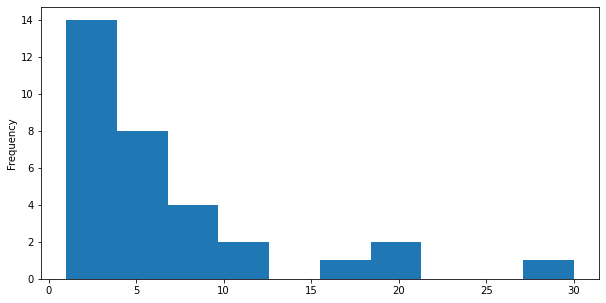

In [36]:
plt.figure(figsize=(10,5))
insta["Influence Score"].value_counts().plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

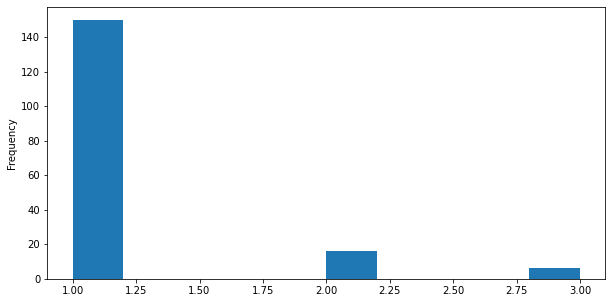

In [37]:
plt.figure(figsize=(10,5))
instagram_data.groupby("Followers").size().plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

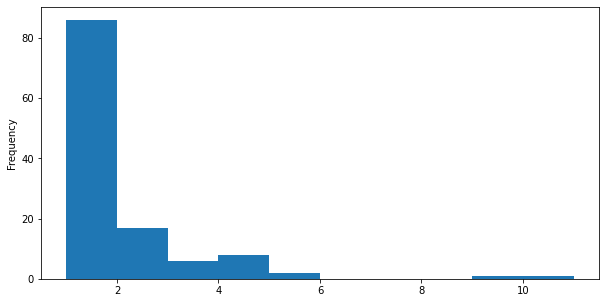

In [38]:
plt.figure(figsize=(10,5))
instagram_data.groupby("Posts").size().plot(kind="hist")

# 3. Which country houses the highest number of Instagram Influencers? Please show thecount of Instagram influencers in different countries using barchart.

<AxesSubplot:>

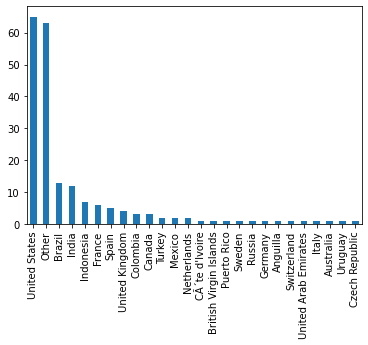

In [39]:
country=insta["Country"].value_counts()

country.plot(kind="bar")

## Top 10 instagram influencer are from.....

In [40]:
country.head(10)

United States     65
Other             63
Brazil            13
India             12
Indonesia          7
France             6
Spain              5
United Kingdom     4
Colombia           3
Canada             3
Name: Country, dtype: int64

# 4. Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes


In [41]:
insta.sort_values(["Followers","Avg. Likes","Total Likes"],ascending=False)["Channel Info"].head(10)

0          Cristiano
1        Kyliejenner
2           Leomessi
3        Selenagomez
4            Therock
5       Arianagrande
6      Kimkardashian
7            Beyonce
8    Khloekardashian
9       Justinbieber
Name: Channel Info, dtype: object

# 5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Scor

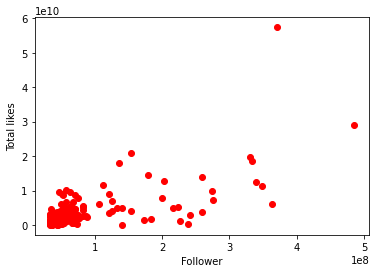

In [42]:
x=insta["Followers"]
y=insta["Total Likes"]
plt.scatter(x,y,c="red")
plt.xlabel("Follower")
plt.ylabel("Total likes")
plt.show()

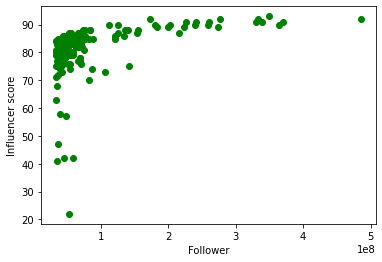

In [43]:
x=insta["Followers"]
y=insta["Influence Score"]
plt.scatter(x,y,c="green")
plt.xlabel("Follower")
plt.ylabel("Influencer score")
plt.show()

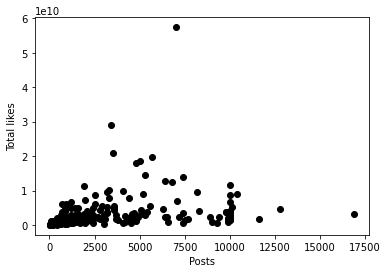

In [44]:
x=insta["Posts"]
y=insta["Total Likes"]
plt.scatter(x,y,c="black")
plt.xlabel("Posts")
plt.ylabel("Total likes")
plt.show()

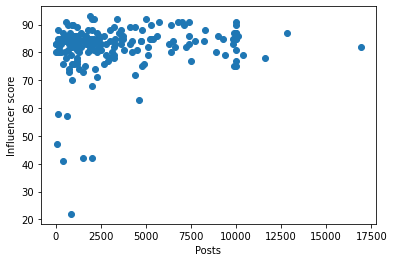

In [45]:
x=insta["Posts"]
y=insta["Influence Score"]
plt.scatter(x,y)
plt.xlabel("Posts")
plt.ylabel("Influencer score")
plt.show()

# Conclusion

# The instagram influencer are from different country and the rank are mostly based on the follower and the content they provide